数据已保存至 kmeans_data_1.csv
使用可用字体: D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf
图像保存至 kmeans_data_1_visual.png


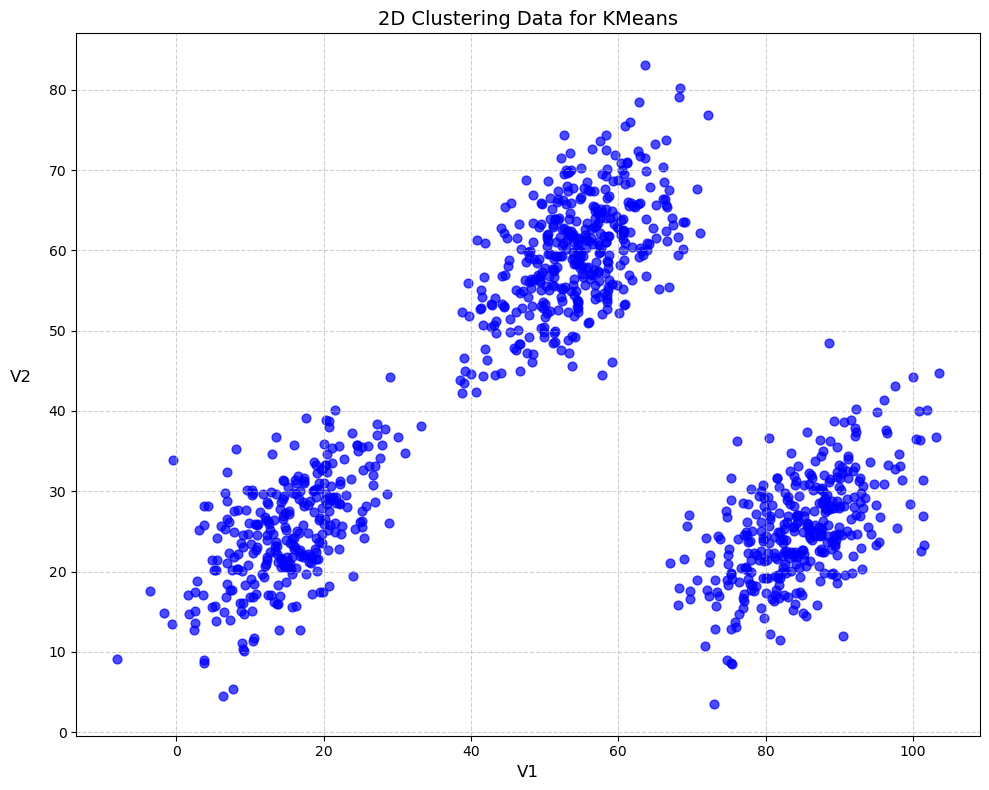

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

def generate_cluster_data(
    n_clusters=3,
    n_samples_per_cluster=[300, 400, 350],
    centers=None,
    cov=None,
    random_state=None
):
    """生成用于 KMeans 聚类的 2D 数据"""
    np.random.seed(random_state)
    if centers is None:
        centers = np.random.rand(n_clusters, 2) * 100
    if cov is None:
        cov = np.array([[50, 30], [30, 50]])
    data = [np.random.multivariate_normal(center, cov, n) 
            for center, n in zip(centers, n_samples_per_cluster)]
    return np.concatenate(data, axis=0)

def save_data_to_csv(data, file_path='kmeans_data_1.csv'):
    """保存数据为CSV（不含标签）"""
    pd.DataFrame(data, columns=['V1', 'V2']).to_csv(file_path, index=False)
    print(f"数据已保存至 {file_path}")

def visualize_data(data, save_path=None):
    """可视化数据（统一蓝色，英文标签，强制使用默认字体）"""
    # 临时设置字体配置，避免查找不存在的字体
    plt.rcParams["font.family"] = ["sans-serif"]  # 使用默认无衬线字体
    
    # 检查并设置可用字体（确保不报错）
    try:
        default_font = findfont(FontProperties(family=['sans-serif']))
        print(f"使用可用字体: {default_font}")
    except Exception:
        print("使用默认字体配置")
    
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.7, s=40)
    
    # 英文标题和标签
    plt.title('2D Clustering Data for KMeans', fontsize=14)
    plt.xlabel('V1', fontsize=12)
    plt.ylabel('V2', fontsize=12,rotation=0, labelpad=20)
    plt.grid(linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"图像保存至 {save_path}")
    plt.show()

if __name__ == "__main__":
    # 生成3个簇的数据
    centers = np.array([[15, 25], [55, 60], [85, 25]])
    n_samples = [300, 400, 350]
    data = generate_cluster_data(centers=centers, n_samples_per_cluster=n_samples, random_state=42)
    save_data_to_csv(data)
    visualize_data(data, 'kmeans_data_1_visual.png')

In [10]:
import matplotlib.font_manager as fm

# 列出所有支持中文的字体
chinese_fonts = [f for f in fm.findSystemFonts() if 'hei' in f.lower() or 'song' in f.lower() or 'kai' in f.lower()]
for font in chinese_fonts:
    print(font)

C:\Windows\Fonts\simkai.ttf
C:\Windows\Fonts\simhei.ttf
